# Задание 4

# Многомерная регрессия

## Октановое число бензина

Набор данных служит хорошим введением в реализацию алгоритмов машинного обучения, поскольку требует элементарной очистки данных, имеет легко понимаемый список переменных и оптимальный размер между слишком игрушечным и слишком громоздким. Датасет содержит данные, полученные при исследовании производственного процесса на нефтеперерабатывающем заводе, октановое число конкретного бензина было измерено как функция от трех видов сырья, и переменной, которая характеризовала условия производства.

Атрибуты:
* **I** - индекс
* **A0** - 1
* **A1** - количество материала 1
* **A2** - количество материала 2
* **A3** - количество материала 3
* **A4** - оценка производственных условий
* **B** - октановое число

## Импортируем библиотеки и загружаем данные

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("octan.csv")
df.head()

,Number,One,Material_1,Material_2,Material_3,Condition,Octane
0,1,1,55.33,1.72,54,1.66219,92.19
1,2,1,59.13,1.20,53,1.58399,92.74
2,3,1,57.39,1.42,55,1.61731,91.88
3,4,1,56.43,1.78,55,1.66228,92.80
4,5,1,55.98,1.58,54,1.63195,92.56


## Получим информацию о датасете

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Number      82 non-null     int64  
 1   One         82 non-null     int64  
 2   Material_1  82 non-null     float64
 3   Material_2  82 non-null     float64
 4   Material_3  82 non-null     int64  
 5   Condition   82 non-null     float64
 6   Octane      82 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 4.6 KB


Набор данных содержит числовые признаки, которые могут быть использованы для решения задачи регрессии. Решим задачу линейной регрессии с помощью библиотеки sklearn

## Проверяем наличие пропущенных значений и выбросов

In [4]:
# проверяем на пропущенные значения
print(df.isnull().sum())

Number        0
One           0
Material_1    0
Material_2    0
Material_3    0
Condition     0
Octane        0
dtype: int64


Пропусков нет

## Исключаем невлияющие категориальные признаки

In [10]:
df_copy = df.copy()
cat_feat = ["Number", "One"]
df_copy.drop(cat_feat, axis=1, inplace=True)
df_copy.head()

,Material_1,Material_2,Material_3,Condition,Octane
0,55.33,1.72,54,1.66219,92.19
1,59.13,1.20,53,1.58399,92.74
2,57.39,1.42,55,1.61731,91.88
3,56.43,1.78,55,1.66228,92.80
4,55.98,1.58,54,1.63195,92.56


## Разделяем данные на признаки и целевую переменную

In [11]:
y = df_copy["Octane"]
X = df_copy.drop("Octane", axis=1)

In [12]:
# убедимся, что данные в нужном нам формате
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [13]:
# посмотрим на признаки
X.head()

,Material_1,Material_2,Material_3,Condition
0,55.33,1.72,54,1.66219
1,59.13,1.20,53,1.58399
2,57.39,1.42,55,1.61731
3,56.43,1.78,55,1.66228
4,55.98,1.58,54,1.63195


## Разделяем данные на обучающую и тестовую выборку

75% данных используется для обучения и 25% - для тестирования.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Применяем операцию нормализации для численной устойчивости

In [15]:
# импортируем класс для стандартизации данных
from sklearn.preprocessing import StandardScaler
# и создания модели линейной регресии
from sklearn.linear_model import LinearRegression

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

## Масштаируем признаки обучающей выборки

In [16]:
X_train_scaled = scaler.fit_transform(X_train)

# убедимся, что объект scaler запомнил значения среднего и СКО для каждого признака
scaler.mean_, scaler.scale_

(array([61.2247541 ,  1.33393443, 55.81967213,  1.61348918]),
 array([9.29651823, 1.31411415, 4.95060254, 0.21291169]))

## Обучаем модель линейной регрессии

In [17]:
# применим масштабированные данные для обучения модели линейной регрессии
model = LinearRegression().fit(X_train_scaled, y_train)
model

LinearRegression()

## Делаем прогноз на основе данных тестирования

In [18]:
# преобразуем тестовые данные с использованием среднего и СКО, рассчитанных на обучающей выборке
# так тестовые данные не повлияют на обучение модели, и мы избежим утечки данных
X_test_scaled = scaler.transform(X_test)

# сделаем прогноз на стандартизированных тестовых данных
y_pred = model.predict(X_test_scaled)
# выведем первые пять значений с помощью диапазона индексов
y_pred[:5]

array([91.16084581, 92.16442961, 90.93005133, 90.50047564, 92.3590638 ])

In [19]:
# импортируем функцию корня среднеквадратической ошибки
from sklearn.metrics import root_mean_squared_error

# сравним тестовые и прогнозные значения
print("Root Mean Squared Error (RMSE):",
       root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 0.4745216964934078


In [20]:
# посмотрим на еще одну метрику - коэффициент детерминации R2
from sklearn.metrics import r2_score
print("R2:", np.round(r2_score(y_test, y_pred), 2))

R2: 0.94


In [21]:
# оценим R-квадрат (метрика (score) по умолчанию для класса LinearRegression)
model.score(X_test_scaled, y_test)

0.9371962817319883

## Итоговое уравнение

In [22]:
# Коэффициенты
print("Coefficients: ", model.coef_)

Coefficients:  [-0.89948274 -0.17062481 -0.13048697  0.39380956]


In [23]:
# Свободный член
print("Intercept: ", model.intercept_)

Intercept:  91.77590163934424


## Оценим влияние признаков на целевую переменную

In [24]:
cat_feat = ["Number", "One"]
df.drop(cat_feat, axis=1, inplace=True)
df

,Material_1,Material_2,Material_3,Condition,Octane
0,55.33,1.72,54,1.66219,92.19
1,59.13,1.20,53,1.58399,92.74
2,57.39,1.42,55,1.61731,91.88
3,56.43,1.78,55,1.66228,92.80
4,55.98,1.58,54,1.63195,92.56
...,...,...,...,...,...
77,67.60,1.84,55,1.64758,91.86
78,64.81,2.24,54,1.69592,91.61
79,63.13,1.60,52,1.66118,92.17
80,63.48,3.46,52,1.48216,91.56


In [25]:
df.corr()

,Material_1,Material_2,Material_3,Condition,Octane
Material_1,1.000000,-0.589451,0.448733,-0.336917,-0.870159
Material_2,-0.589451,1.000000,-0.298396,0.161196,0.392359
Material_3,0.448733,-0.298396,1.000000,-0.721748,-0.638490
Condition,-0.336917,0.161196,-0.721748,1.000000,0.628730
Octane,-0.870159,0.392359,-0.638490,0.628730,1.000000


## Визуализация результатов регрессии

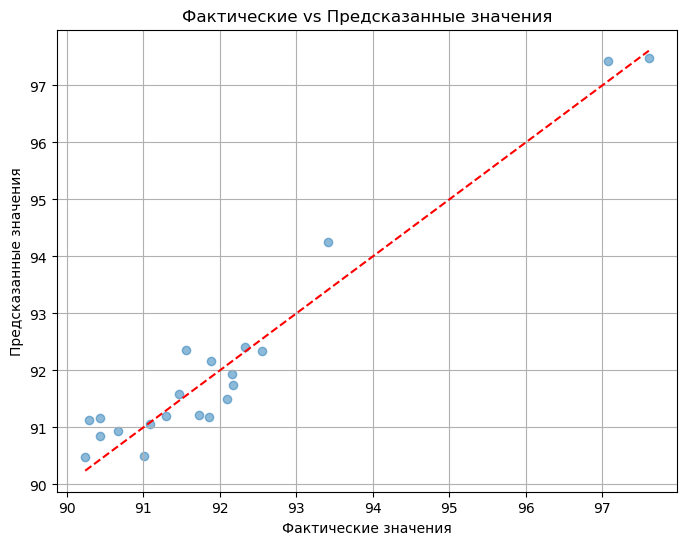

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения")
plt.grid()
plt.show()

## Остатки регрессии (Residuals Plot)

Остаток - это разница между фактическим и предсказанным значением (y_true - y_pred). Этот график помогает проверить важное предположение линейной регрессии: что остатки случайны и не имеют паттернов.

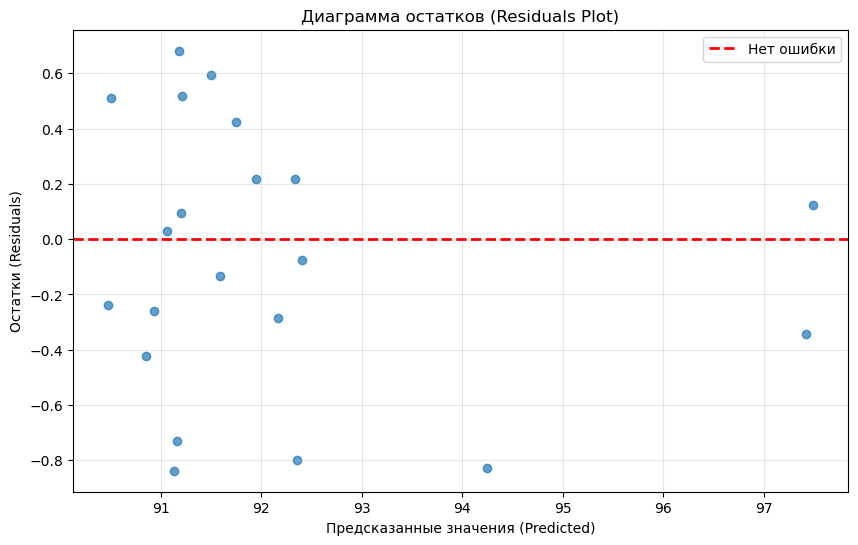

In [27]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--", linewidth=2, label="Нет ошибки")
plt.xlabel("Предсказанные значения (Predicted)")
plt.ylabel("Остатки (Residuals)")
plt.title("Диаграмма остатков (Residuals Plot)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Результат:

Хорошо: Остатки беспорядочно разбросаны вокруг горизонтальной красной линии (нуля), нет никаких явных дуг, форм или конусов.